##  Instalação de Bibliotecas

In [1]:
!pip install torch transformers scikit-learn matplotlib umap-learn

print("✅ Instalação concluída!")

  Using cached torch-2.8.0-cp39-none-macosx_11_0_arm64.whl.metadata (30 kB)
  Using cached transformers-4.57.3-py3-none-any.whl.metadata (43 kB)
  Using cached scikit_learn-1.6.1-cp39-cp39-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.2.1-py3-none-any.whl.metadata (5.2 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl.metadata (10 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached pyyaml-6.0.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached regex-2025.11.3-cp39-cp39-macosx_11_0_arm64.whl.metadata

## Importação de Bibliotecas

Importando todas as bibliotecas necessárias para o projeto.

In [2]:
import torch
from transformers import BertTokenizer, BertModel
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap

print("✅ Todas as bibliotecas foram importadas com sucesso!")

/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ Todas as bibliotecas foram importadas com sucesso!


# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [3]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia\'s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa\'s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria\'s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India\'s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread\'s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [4]:
# Carregar o modelo BERT pré-treinado e o tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Colocar o modelo em modo de avaliação
model.eval()

def get_bert_embedding(text):
    """
    Gera o embedding BERT para um texto.
    Retorna a representação do token [CLS] da última camada.
    """
    # Tokenizar o texto
    inputs = tokenizer(text, return_tensors='pt', truncation=True, 
                      padding=True, max_length=512)
    
    # Gerar embeddings sem calcular gradientes
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Extrair o embedding do token [CLS]
    # outputs.last_hidden_state tem formato: [batch_size, sequence_length, hidden_size]
    # [:, 0, :] significa: pegar todas as batches, apenas o primeiro token (CLS), todas as features
    # .squeeze() remove dimensões extras (batch_size=1 vira um vetor simples)
    # .numpy() converte de tensor PyTorch para array NumPy
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    
    return cls_embedding

# Gerar embeddings para todas as sentenças
print("Gerando embeddings para {} sentenças...".format(len(sentences)))
embeddings = []

for i, sentence in enumerate(sentences):
    embedding = get_bert_embedding(sentence)
    embeddings.append(embedding)
    
    if (i + 1) % 20 == 0:
        print(f"Processadas {i + 1}/{len(sentences)} sentenças")

# Converter para array numpy
X = np.array(embeddings)

print(f"\nForma da matriz de embeddings: {X.shape}")
print(f"Número de textos (N): {X.shape[0]}")
print(f"Dimensionalidade (dim): {X.shape[1]}")

Gerando embeddings para 88 sentenças...
Processadas 20/88 sentenças
Processadas 40/88 sentenças
Processadas 60/88 sentenças
Processadas 80/88 sentenças

Forma da matriz de embeddings: (88, 768)
Número de textos (N): 88
Dimensionalidade (dim): 768


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

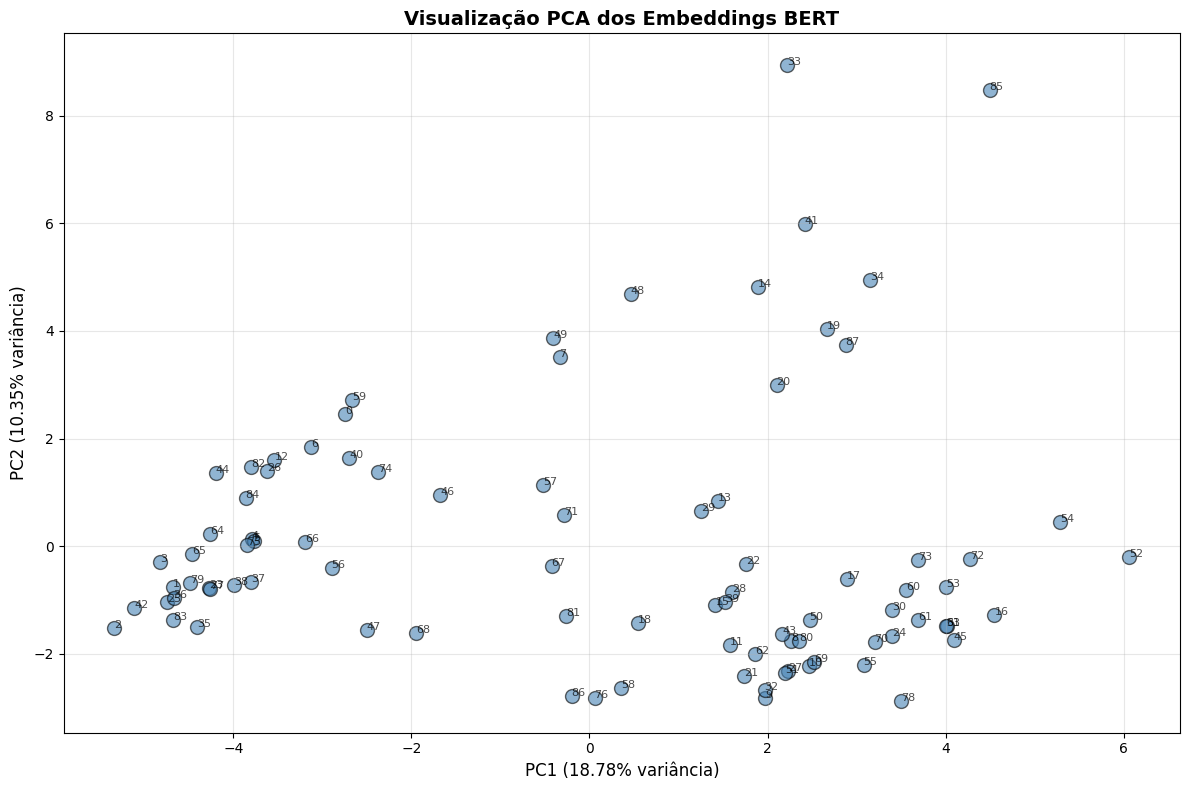

Variância explicada pelo PC1: 18.78%
Variância explicada pelo PC2: 10.35%
Variância total explicada: 29.14%


In [5]:
# Aplicar PCA para reduzir a 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar os resultados
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=100, c='steelblue', edgecolors='k')

# Adicionar rótulos para todos os pontos
for i in range(len(sentences)):
    plt.annotate(f"{i}", (X_pca[i, 0], X_pca[i, 1]), fontsize=8, alpha=0.7)

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variância)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variância)', fontsize=12)
plt.title('Visualização PCA dos Embeddings BERT', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Variância explicada pelo PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Variância explicada pelo PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Variância total explicada: {pca.explained_variance_ratio_.sum():.2%}")

## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

Executando t-SNE com perplexity=5...


/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Executando t-SNE com perplexity=30...


/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Executando t-SNE com perplexity=50...


/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


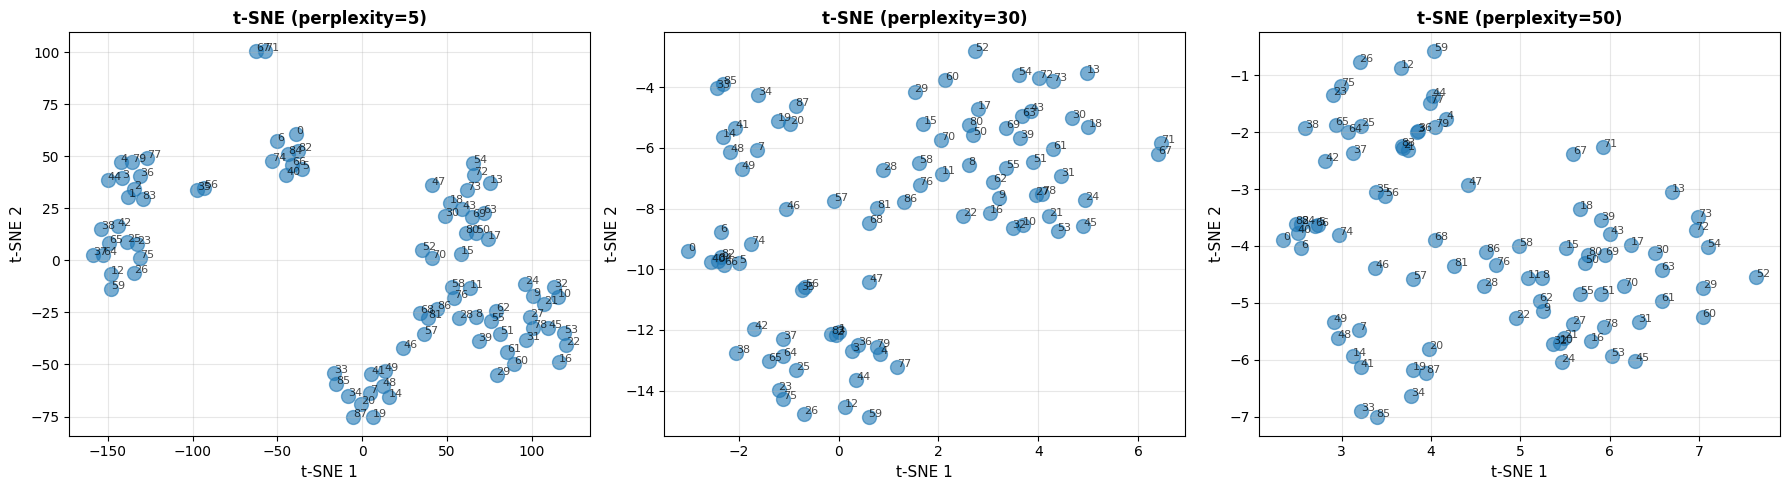


Observação: t-SNE com perplexity menor enfatiza estrutura local,
enquanto valores maiores preservam mais estrutura global.


In [6]:
# Aplicar t-SNE com diferentes valores de perplexity
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

perplexities = [5, 30, 50]

for idx, perplexity in enumerate(perplexities):
    print(f"Executando t-SNE com perplexity={perplexity}...")
    
    tsne = TSNE(n_components=2, perplexity=perplexity, 
                learning_rate=200, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    
    # Plotar
    axes[idx].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6, s=100)
    
    # Adicionar rótulos para todos os pontos
    for i in range(len(sentences)):
        axes[idx].annotate(f"{i}", (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8, alpha=0.7)
    
    axes[idx].set_xlabel('t-SNE 1', fontsize=11)
    axes[idx].set_ylabel('t-SNE 2', fontsize=11)
    axes[idx].set_title(f't-SNE (perplexity={perplexity})', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservação: t-SNE com perplexity menor enfatiza estrutura local,")
print("enquanto valores maiores preservam mais estrutura global.")

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

Executando UMAP com n_neighbors=5, min_dist=0.1...


/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Executando UMAP com n_neighbors=15, min_dist=0.1...
Executando UMAP com n_neighbors=30, min_dist=0.1...
Executando UMAP com n_neighbors=15, min_dist=0.5...


/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/thauannyramos/Documents/projeto unsupervised learning/.venv/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


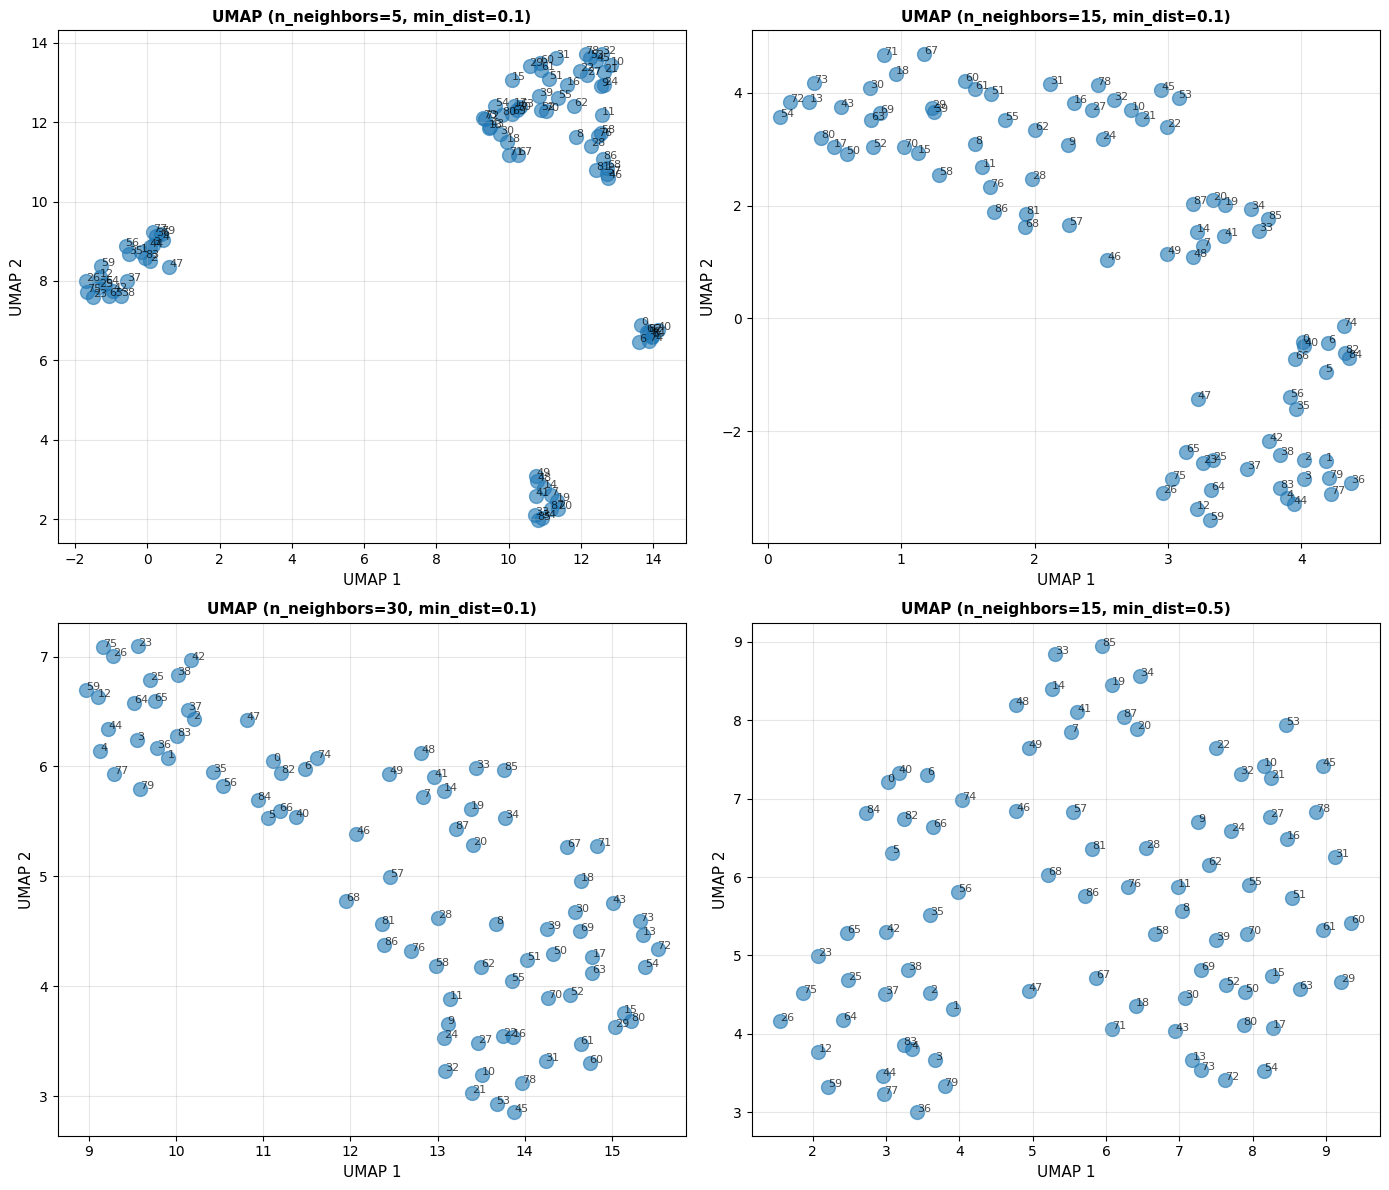


Observação: n_neighbors controla o equilíbrio entre estrutura local e global.
min_dist controla o quão próximos os pontos podem ficar na projeção.


In [7]:
# Aplicar UMAP com diferentes configurações
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

configs = [
    {'n_neighbors': 5, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.1},
    {'n_neighbors': 30, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.5}
]

for idx, config in enumerate(configs):
    print(f"Executando UMAP com n_neighbors={config['n_neighbors']}, min_dist={config['min_dist']}...")
    
    reducer = umap.UMAP(n_neighbors=config['n_neighbors'], 
                        min_dist=config['min_dist'],
                        random_state=42)
    X_umap = reducer.fit_transform(X)
    
    # Plotar
    axes[idx].scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6, s=100)
    
    # Adicionar rótulos para todos os pontos
    for i in range(len(sentences)):
        axes[idx].annotate(f"{i}", (X_umap[i, 0], X_umap[i, 1]), fontsize=8, alpha=0.7)
    
    axes[idx].set_xlabel('UMAP 1', fontsize=11)
    axes[idx].set_ylabel('UMAP 2', fontsize=11)
    axes[idx].set_title(f'UMAP (n_neighbors={config["n_neighbors"]}, min_dist={config["min_dist"]})', 
                       fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservação: n_neighbors controla o equilíbrio entre estrutura local e global.")
print("min_dist controla o quão próximos os pontos podem ficar na projeção.")

## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

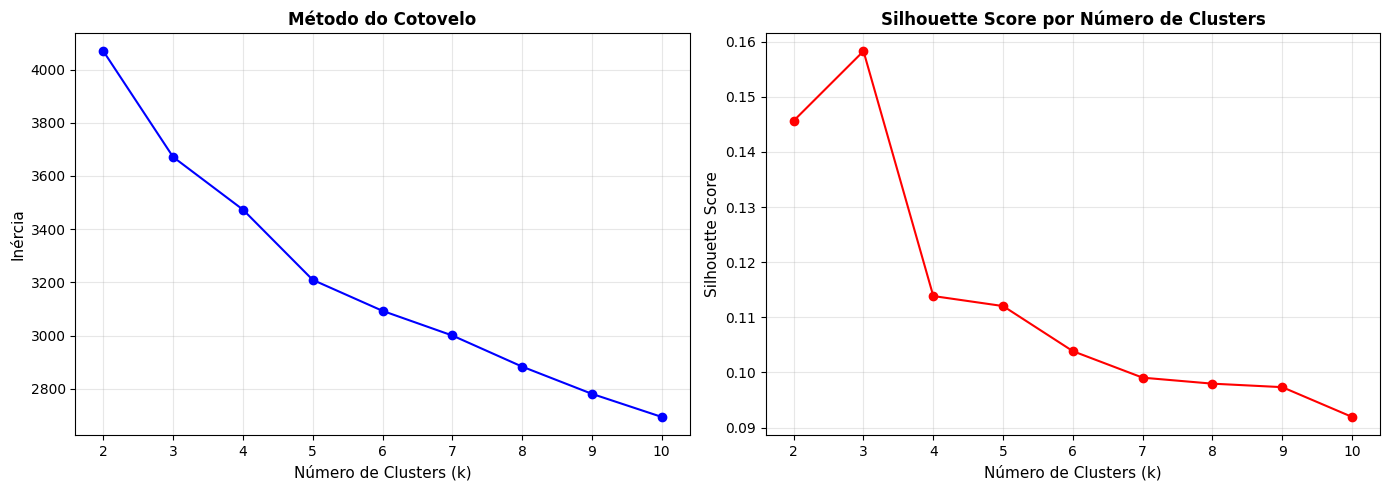

✅ Modelo K-Means treinado com 6 clusters
📄 Análise dos clusters exportada para 'cluster_analysis.txt'


In [8]:
def calcular_metricas_clusters(X, k_range):
    """Calcula inércia e silhouette score para diferentes valores de k."""
    inertias = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_temp.fit(X)
        inertias.append(kmeans_temp.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans_temp.labels_))
    
    return inertias, silhouette_scores


def plotar_metodo_cotovelo(k_range, inertias, silhouette_scores):
    """Plota os gráficos do método do cotovelo e silhouette score."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico de inércia (cotovelo)
    axes[0].plot(k_range, inertias, 'bo-')
    axes[0].set_xlabel('Número de Clusters (k)', fontsize=11)
    axes[0].set_ylabel('Inércia', fontsize=11)
    axes[0].set_title('Método do Cotovelo', fontsize=12, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Gráfico de silhouette score
    axes[1].plot(k_range, silhouette_scores, 'ro-')
    axes[1].set_xlabel('Número de Clusters (k)', fontsize=11)
    axes[1].set_ylabel('Silhouette Score', fontsize=11)
    axes[1].set_title('Silhouette Score por Número de Clusters', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


def treinar_kmeans(X, n_clusters):
    """Treina o modelo K-Means com o número de clusters especificado."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    return kmeans, labels


def exportar_analise_clusters(sentences, labels, n_clusters, filename='cluster_analysis.txt'):
    """Exporta a análise dos clusters para um arquivo."""
    with open(filename, 'w', encoding='utf-8') as f:
        f.write("="*60 + "\n")
        f.write("ANÁLISE DO CONTEÚDO DOS CLUSTERS\n")
        f.write("="*60 + "\n\n")
        
        for cluster_id in range(n_clusters):
            cluster_indices = np.where(labels == cluster_id)[0]
            
            f.write(f"CLUSTER {cluster_id} ({len(cluster_indices)} sentenças):\n")
            f.write("-" * 50 + "\n")
            
            for idx in cluster_indices:
                f.write(f"   • {sentences[idx]}\n")
            
            f.write("\n")
        
        f.write("="*60 + "\n")


# ============================================================
# Identificar número ideal de clusters
# ============================================================

# 1. Calcular métricas para k de 2 a 10
K_range = range(2, 11)
inertias, silhouette_scores = calcular_metricas_clusters(X, K_range)

# 2. Plotar método do cotovelo
plotar_metodo_cotovelo(K_range, inertias, silhouette_scores)

# 3. Treinar modelo com k=6
n_clusters = 6
kmeans, labels = treinar_kmeans(X, n_clusters)
print(f"✅ Modelo K-Means treinado com {n_clusters} clusters")

# 4. Exportar análise dos clusters
exportar_analise_clusters(sentences, labels, n_clusters)
print("📄 Análise dos clusters exportada para 'cluster_analysis.txt'")

In [9]:
# Mapeamento dos clusters para categorias semânticas
# Baseado na análise manual dos exemplos em 'cluster_analysis.txt'
# De acordo com o conteúdo observado em cada cluster
cluster_names = {
    0: "Culinária Pessoal",
    1: "Inteligência Artificial/ML",
    2: "Geografia/Localização",
    3: "Finanças/Investimentos",
    4: "Técnicas Culinárias",
    5: "Dicas de Cozinha"
}

print(f"✅ {len(cluster_names)} categorias definidas")

✅ 6 categorias definidas


In [10]:
def classificar_texto(texto: str) -> dict:
    """
    Classifica um texto em uma das categorias identificadas.
    
    Args:
        texto (str): O texto a ser classificado
        
    Returns:
        dict: Dicionário com informações sobre a classificação
    """
    # Gerar embedding do texto
    embedding = get_bert_embedding(texto)
    embedding = embedding.reshape(1, -1)
    
    # Calcular distância até cada centroide de cluster
    distances = cdist(embedding, kmeans.cluster_centers_, metric='euclidean')[0]
    
    # Encontrar o cluster mais próximo
    cluster_id = np.argmin(distances)
    cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")
    distance = distances[cluster_id]
    
    return {
        'texto': texto,
        'cluster_id': int(cluster_id),
        'categoria': cluster_name,
        'distancia': float(distance)
    }

print("✅ Função classificar_texto() definida")

✅ Função classificar_texto() definida


In [ ]:
# Importar frases de teste do arquivo
with open('frases_teste_embeddings.txt', 'r', encoding='utf-8') as f:
    textos_teste = [linha.strip() for linha in f if linha.strip()]

print(f"✅ {len(textos_teste)} frases importadas de 'frases_teste.txt'")

✅ 100 frases importadas de 'frases_teste.txt'


In [12]:
# Classificar e exportar resultados
resultados = [classificar_texto(texto) for texto in textos_teste]

with open('classificacao_resultados.txt', 'w', encoding='utf-8') as f:
    for r in resultados:
        f.write(f"{r['categoria']}: {r['texto']}\n")

print(f"✅ {len(resultados)} frases classificadas e exportadas para 'classificacao_resultados.txt'")

✅ 100 frases classificadas e exportadas para 'classificacao_resultados.txt'
